Install dependencies

In [1]:
#!pip install yfinance --upgrade --no-cache-dir
#!pip install pandas-datareader --upgrade --no-cache-dir
#!pip install numpy --upgrade --no-cache-dir
#!pip install pytrends


In [2]:
#%matplotlib notebook
import numpy as np                  # import a package with specified name

import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec
import pandas as pd
import matplotlib.pyplot as plt     # for plots
from pandas_datareader import data as pdr
from pytrends.request import TrendReq
import datetime
import pytrends
import seaborn as sns
from pytrends.request import TrendReq
import plotly.express as px
import plotly.offline as pyo
import pandas as pd
import plotly.graph_objects as go

### 1. Download data 

Google trends data of WhatsApp Instagram Facebook and Messenger

In [3]:
pytrend = TrendReq()
kw_list = ["WhatsApp", "Instagram", "Facebook", "Messenger"]
data = pytrend.get_historical_interest(kw_list, year_start=2017, month_start=4, day_start=19, year_end=2022, month_end=4, day_end=18, frequency="daily", cat=0, geo='', gprop='', sleep=0)
data.to_csv('social_networks.csv')

/Users/constantinbogdanas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pytrends/request.py:589: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/constantinbogdanas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pytrends/request.py:589: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/constantinbogdanas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pytrends/request.py:589: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/constantinbogdanas/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pytrends/request.py:589: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/Users/constantinbogdanas/.pyenv/versions/3.8.10/lib

Meta data from Yahoo Finance API

In [4]:

meta_df = pdr.get_data_yahoo('FB', 
                          start=datetime.datetime(2017, 4, 19), 
                          end=datetime.datetime(2022, 4, 17))

social_networks_df = pd.read_csv('social_networks.csv', sep=",")
print(len(meta_df), len(social_networks_df))

1258 1833


### 2. Financial analysis of Meta stock 

In [5]:



fig = px.line(meta_df, x=meta_df.index, y=meta_df["Close"],
              
              title='Meta Stock Price')
fig.update_xaxes(
    tickformat="%b\n%Y",
    rangeslider_visible=True,)
fig.show()

In [6]:
daily_close_df = meta_df['Close']
daily_pct_c = daily_close_df.pct_change()
daily_pct_c.fillna(0, inplace=True)
daily_log_returns = np.log(daily_close_df.pct_change()+1)
print(daily_log_returns)
print(daily_pct_c)

Date
2017-04-19         NaN
2017-04-20    0.010697
2017-04-21   -0.000835
2017-04-24    0.012381
2017-04-25    0.006987
                ...   
2022-04-08   -0.002785
2022-04-11   -0.026757
2022-04-12   -0.010776
2022-04-13    0.003962
2022-04-14   -0.022627
Name: Close, Length: 1258, dtype: float64
Date
2017-04-19    0.000000
2017-04-20    0.010754
2017-04-21   -0.000835
2017-04-24    0.012458
2017-04-25    0.007012
                ...   
2022-04-08   -0.002781
2022-04-11   -0.026402
2022-04-12   -0.010718
2022-04-13    0.003969
2022-04-14   -0.022373
Name: Close, Length: 1258, dtype: float64


In [7]:
# Resample `meta` to business months, take last observation as value 
monthly = meta_df.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `meta` to quarters, take the mean as value per quarter
quarter = meta_df.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-31,0.086850,0.082811,0.087580,0.084335,0.087189,0.084335
2017-12-31,0.109292,0.110186,0.109718,0.108734,-0.122316,0.108734
2018-04-30,0.007186,-0.005080,0.001557,0.001487,1.162424,0.001487
2018-08-31,0.069372,0.077613,0.071304,0.074424,-0.321932,0.074424
2018-12-31,-0.200561,-0.210299,-0.204453,-0.207834,0.176245,-0.207834
2019-04-30,0.093485,0.104170,0.096442,0.101430,-0.272809,0.101430
2019-08-31,0.144356,0.143022,0.146459,0.142664,-0.190009,0.142664
2019-12-31,0.017686,0.021506,0.019983,0.020108,-0.152220,0.020108


In [8]:


# Pull up summary statistics

df = daily_pct_c 
fig = px.histogram(df, x=['Close'],  marginal="box")
fig.show()

print(daily_pct_c.describe())


count    1258.000000
mean        0.000582
std         0.022975
min        -0.263901
25%        -0.009393
50%         0.000977
75%         0.012461
max         0.108164
Name: Close, dtype: float64


In [9]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

Date
2017-04-19    1.000000
2017-04-20    1.010754
2017-04-21    1.009911
2017-04-24    1.022492
2017-04-25    1.029662
                ...   
2022-04-08    1.562733
2022-04-11    1.521473
2022-04-12    1.505166
2022-04-13    1.511141
2022-04-14    1.477332
Name: Close, Length: 1258, dtype: float64


In [10]:

fig = px.area(cum_daily_return, x=cum_daily_return.index, y=cum_daily_return, title='Cumulative Daily Returns')
fig.update_xaxes(
    title='Date',
    tickformat="%b\n%Y")
fig.update_yaxes(title="Cum Daily Returns")
fig.show()
cum_daily_return.head()


Date
2017-04-19    1.000000
2017-04-20    1.010754
2017-04-21    1.009911
2017-04-24    1.022492
2017-04-25    1.029662
Name: Close, dtype: float64

In [11]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

# Investing in Meta stock from 2017-04-19 to 2022-04-18 gives as much as a ration of 1.55 in returns which is not that great.
# if we were to sell or stock in January 2022 we would have a return of 2.32 which is much better.
# Let's try to relate our spikes with Real world news events.
# We will to analyse 3 spikes 2019, 2020 and 2022.


Date
2017-04-30    1.024654
2017-05-31    1.055979
2017-06-30    1.068950
2017-07-31    1.128365
2017-08-31    1.189007
                ...   
2021-12-31    2.325479
2022-01-31    2.245076
2022-02-28    1.605661
2022-03-31    1.456807
2022-04-30    1.556850
Freq: M, Name: Close, Length: 61, dtype: float64


'\n Min de la période du premier spike124.05999755859375, Max = 217.5, differnce en pourcentages: 42.960920662715516\n Min de la période du deuxième  spike146.00999450683594, Max = 223.22999572753906, differnce en pourcentages: 34.59212592332491\n Min de la période du troisième  spike186.6300048828125, Max = 347.55999755859375, differnce en pourcentages: 46.30279485735429\n '

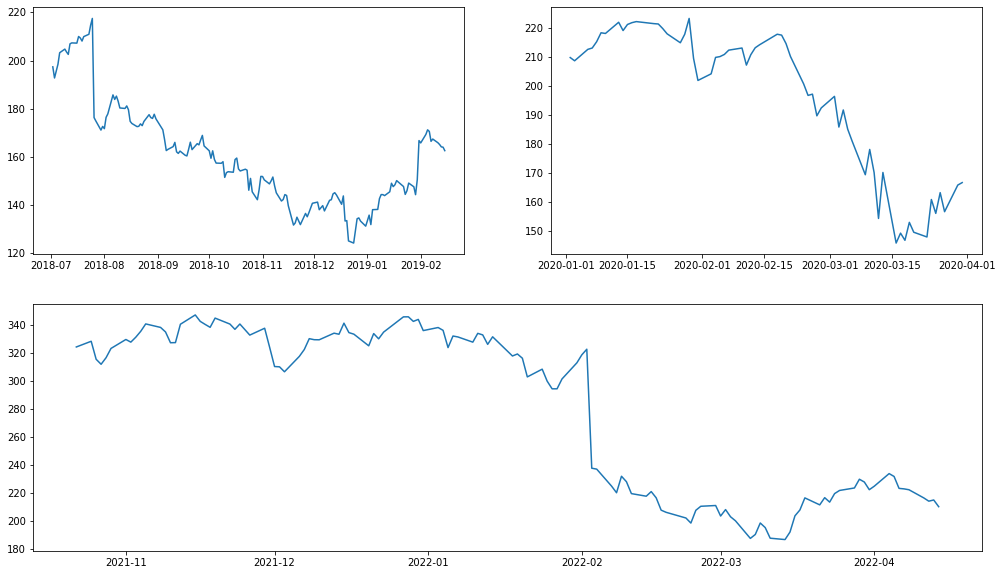

In [12]:
spike_1 = meta_df.loc["2018-07-01":"2019-02-15"]["Close"]
spike_2 = meta_df.loc["2020-01-01":"2020-03-31"]["Close"]
spike_3 = meta_df.loc["2021-10-22":"2022-04-15"]["Close"]

# Create 2x2 sub plots
gs = gridspec.GridSpec(2, 2)
pl.figure(figsize=(17,10))
ax = pl.subplot(gs[0, 0]) # row 0, col 0
pl.plot(spike_1)

ax = pl.subplot(gs[0, 1]) # row 0, col 1
pl.plot(spike_2)

ax = pl.subplot(gs[1, :]) # row 1, span all columns
pl.plot(spike_3)

def percentage_diff(current, previous):
    if current == previous:
        return 0
    try:
        return (abs(current - previous) / previous) * 100.0
    except ZeroDivisionError:
        return float('inf')

f'''
 Min de la période du premier spike{spike_1.min()}, Max = {spike_1.max()}, differnce en pourcentages: {percentage_diff(spike_1.min(),spike_1.max())}
 Min de la période du deuxième  spike{spike_2.min()}, Max = {spike_2.max()}, differnce en pourcentages: {percentage_diff(spike_2.min(),spike_2.max())}
 Min de la période du troisième  spike{spike_3.min()}, Max = {spike_3.max()}, differnce en pourcentages: {percentage_diff(spike_3.min(),spike_3.max())}
 '''



**1. Spike_1 period between ["2018-07-01":"2019-02-15"]**

The causes for the spike were:
1. Multiple scandals regarding the protection of its users' personal data.
2. 2 million European users had left Facebook since the beginning of the year.
3. The number of users increases much less rapidly than before.
4. The massive hack of 50 million accounts.
5. Multiple scandals about Cambridge Analytica.
6. And many more ...
   
See this link for reference: 
https://www.latribune.fr/technos-medias/internet/2018-l-annee-noire-de-facebook-801885.html

**2.Spike_2 period between ["2020-01-01":"2020-03-31"]** 
1. The world's largest social media network was not immune to a global economic shutdown resulting from the COVID-19 outbreak, despite the company reporting higher use of all its apps while people shelter in place.

See reference: https://www.nasdaq.com/articles/why-facebook-stock-fell-13.3-in-march-2020-04-03

**2.Spike_3 period between ["2022-01-22":"2022-02-15"]**  

1. The first time the company experienced a drop in users in its history.
2. Investing too much money in metaverse.

See refs:

 https://www.cnbc.com/2022/02/03/facebooks-232billion-drop-in-value-sets-all-time-record.html

 https://fortune.com/2022/02/02/facebook-lost-200-billion-in-market-value-earnings/


### 3. Google Trends analysis

In [13]:
social_networks_df = pd.read_csv('social_networks.csv',sep=',', index_col= 'date', parse_dates=['date'], dayfirst=True)
social_networks_df.drop(columns=['isPartial'], inplace=True)
social_networks_df

,WhatsApp,Instagram,Facebook,Messenger
date,,,,
2017-04-19,6,9,92,1
2017-04-20,5,9,88,1
2017-04-21,5,9,92,1
2017-04-22,5,9,96,1
2017-04-23,5,9,95,1
...,...,...,...,...
2022-04-14,52,45,93,2
2022-04-15,39,45,93,2
2022-04-16,38,45,93,2


In [14]:
buttons =[]
fig = px.line(social_networks_df, x=social_networks_df.index, y=social_networks_df.columns, title="Meta Social Media Trends")


buttons.append(dict(method='update',
                        label="All",
                        args = [{'visible': [True for r in social_networks_df]}]
                        ))
for rs in social_networks_df:
    buttons.append(dict(method='update',
                        label=rs,
                        args = [{'visible': [rs == r for r in social_networks_df]}]
                        ))
# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons, "direction": "down", "showactive": True, "x": 0.5, "y": 1.15}])
fig.show()

##### Monthly Trends

In [15]:
social_networks_df_monthly = pd.read_csv('social_networks.csv',sep=',', index_col= 'date', parse_dates=['date'], dayfirst=True)

social_networks_df_monthly = social_networks_df.resample("M").max()
social_networks_df_monthly

,WhatsApp,Instagram,Facebook,Messenger
date,,,,
2017-04-30,6,10,99,1
2017-05-31,13,10,100,1
2017-06-30,6,10,96,1
2017-07-31,6,10,96,1
2017-08-31,7,11,98,1
...,...,...,...,...
2021-12-31,24,18,37,1
2022-01-31,22,19,37,1
2022-02-28,69,50,100,3


In [16]:
buttons2 =[]
if "isPartial" in social_networks_df_monthly :
    social_networks_df_monthly = social_networks_df_monthly.drop(columns=["isPartial"])
fig = px.line(social_networks_df_monthly, x=social_networks_df_monthly.index, y=social_networks_df_monthly.columns, title="Meta Social Media Trends")

buttons2.append(dict(method='update',
                        label="All",
                        args = [{'visible': [True for r in social_networks_df_monthly.columns]}]
                        ))
for rs in social_networks_df_monthly:
    buttons2.append(dict(method='update',
                        label=rs,
                        args = [{'visible': [rs == r for r in social_networks_df_monthly.columns]}]
                        ))
# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons2, "direction": "down", "showactive": True, "x": 0.5, "y": 1.15}])

fig.show()

#### Daily Trends

In [17]:
buttons2 =[]

if "isPartial" in social_networks_df :
    social_networks_df = social_networks_df.drop(columns=["isPartial"])
fig = px.line(social_networks_df, x=social_networks_df.index, y=social_networks_df.columns, title="Meta Social Media Trends")

buttons2.append(dict(method='update',
                        label="All",
                        args = [{'visible': [True for r in social_networks_df.columns]}]
                        ))
for rs in social_networks_df.columns:
    buttons2.append(dict(method='update',
                        label=rs,
                        args = [{'visible': [rs == r for r in social_networks_df.columns]}]
                        ))
# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons2, "direction": "down", "showactive": True, "x": 0.5, "y": 1.15}])

fig.show()

In [18]:
buttons2 =[]
fig = px.line(social_networks_df.loc['2018-07-01': "2019-02-15"], y=social_networks_df.columns, title="Meta Social Media Trends")

buttons2.append(dict(method='update',
                        label="All",
                        args = [{'visible': [True for r in social_networks_df.columns]}]
                        ))
for rs in social_networks_df.columns:
    buttons2.append(dict(method='update',
                        label=rs,
                        args = [{'visible': [rs == r for r in social_networks_df.columns]}]
                        ))
# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons2, "direction": "down", "showactive": True, "x": 0.5, "y": 1.15}])

fig.show()

In [19]:
buttons2 =[]
fig = px.line(social_networks_df.loc["2020-01-01":"2020-03-31"], y=social_networks_df.columns, title="Meta Social Media Trends")

buttons2.append(dict(method='update',
                        label="All",
                        args = [{'visible': [True for r in social_networks_df.columns]}]
                        ))
for rs in social_networks_df.columns:
    buttons2.append(dict(method='update',
                        label=rs,
                        args = [{'visible': [rs == r for r in social_networks_df.columns]}]
                        ))
# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons2, "direction": "down", "showactive": True, "x": 0.5, "y": 1.15}])

fig.show()

In [20]:
buttons2 =[]
fig = px.line(social_networks_df["2018-07-01":"2019-02-15"], y=social_networks_df.columns, title="Meta Social Media Trends")

buttons2.append(dict(method='update',
                        label="All",
                        args = [{'visible': [True for r in social_networks_df.columns]}]
                        ))
for rs in social_networks_df.columns:
    buttons2.append(dict(method='update',
                        label=rs,
                        args = [{'visible': [rs == r for r in social_networks_df.columns]}]
                        ))
# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons2, "direction": "down", "showactive": True, "x": 0.5, "y": 1.15}])


fig.show()
period = social_networks_df["2018-07-01":"2019-02-15"]
f'''{
percentage_diff(period["Facebook"].min(), period["Facebook"].max()),
percentage_diff(period["WhatsApp"].min(), period["WhatsApp"].max()),
percentage_diff(period["Messenger"].min(), period["Messenger"].max()),
percentage_diff(period["Instagram"].min(), period["Instagram"].max()),
}
'''


'(38.0, 53.84615384615385, 50.0, 52.0)\n'

In [21]:

social_networks_df.head()

df = pd.concat([social_networks_df,meta_df["Close"]], axis=1).ffill()
df_corr = df.corr()
df_corr

,WhatsApp,Instagram,Facebook,Messenger,Close
WhatsApp,1.000000,0.816303,0.067123,0.662925,0.470958
Instagram,0.816303,1.000000,0.340020,0.782226,0.246073
Facebook,0.067123,0.340020,1.000000,0.378269,-0.702898
Messenger,0.662925,0.782226,0.378269,1.000000,0.171403
Close,0.470958,0.246073,-0.702898,0.171403,1.000000


<AxesSubplot:>

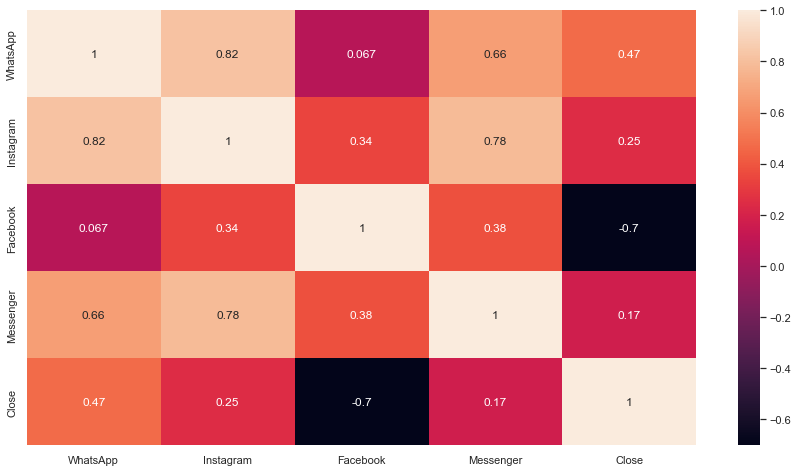

In [22]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df_corr,annot=True,)

In [23]:
buttons2 =[]
fig = px.line(df, y=df.columns, title="Meta Social Media Trends")

buttons2.append(dict(method='update',
                        label="All",
                        args = [{'visible': [True for r in df.columns]}]
                        ))
for rs in df.columns:
    buttons2.append(dict(method='update',
                        label=rs,
                        args = [{'visible': [rs == r for r in df.columns]}]
                        ))
# Add dropdown menus to the figure
fig.update_layout(showlegend=False, updatemenus=[{"buttons": buttons2, "direction": "down", "showactive": True, "x": 0.5, "y": 1.15}])

fig.show()
